<a href="https://colab.research.google.com/github/Shahlojon/Fashion-Mnist/blob/master/Fashion_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"> <ins> Набор данных Fashion MNIST</ins></h1>

<h2>В данной работе мы будем использовать глубокую нейронную сеть, которая обучится классифицировать изображения из набора данных Fashion MNIST.</h2>

<table>
  <tr><td>
    <img src="https://i.pinimg.com/originals/01/20/4b/01204be9b14e773d4a58b0207cac2cbf.gif"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist"> Образцы Fashion-MNIST</a> (Zalando, лицензия MIT).<br/>&nbsp;
  </td></tr>
</table>

Наш набор состоит из изображений размером 28х28, каждый пиксель которого представляет собой оттенок серого.

<b><h3>`TensorFlow`</h3></b> 
 <b>**`TensorFlow`**</b> -открытая программная библиотека для машинного обучения, разработанная компанией Google для решения задач построения и тренировки нейронной сети с целью автоматического нахождения и классификации образов, достигая качества человеческого восприятия.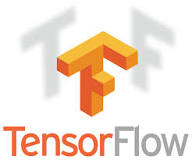

Набор для TensorFlow предоставляет коллекцию готовых к использованию данных для обучения.  Сначала установим TensorFlow последнии версии  и импортируем Tensorflow. Затем мы загружаем fashion-mnist, который является одним из наборов данных Keras.

In [0]:
# TensorFlow и tf.keras
import tensorflow as tf
from tensorflow import keras

# Вспомогательные библиотеки
import numpy as np
import matplotlib.pyplot as plt
#Печатаем версию tensorflow
print(tf.__version__)

2.2.0


In [0]:
# Загрузим fashion-mnist 
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
print("train_images shape:", train_images.shape, "train_labels shape:", train_labels.shape)

train_images shape: (60000, 28, 28) train_labels shape: (60000,)


Загрузка датасета возвращает четыре массива NumPy:

* Массивы `train_images` и `train_labels` являются *тренировочным сетом* — данными, на которых модель будет обучаться.
* Модель тестируется на *проверочном сете*, а именно массивах `test_images` и `test_labels`.

Изображения являются 28х28 массивами NumPy, где значение пикселей варьируется от 0 до 255. *Метки (labels)* - это массив целых чисел от 0 до 9. Они соответствуют *классам* одежды изображенной на картинках:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Каждому изображению соответствует единственная метка. Так как *названия классов* не включены в датасет, сохраним их тут для дальнейшего использования при построении изображений в переменную `fashion_mnist_labels`:

60000 train set
10000 test set
y = 2 Pullover


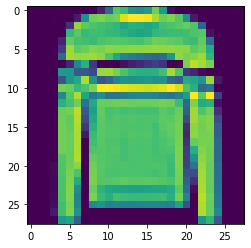

In [0]:
# Данный массив хранит названия меток изображения
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Печатаем номера наборов обучения и тестирования
print(train_images.shape[0], 'train set')
print(test_images.shape[0], 'test set')

# Индекс изображение мы можем выбрать любое число от 0 до 59,999
img_index = 5
# train_labels содержит метки от 0 до 9
label_index = train_labels[img_index]
#Печатаем метку, например под y = 2 расположен Поллувер
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# Показываем одну картику из базы
plt.imshow(train_images[img_index])

<p>Нормализируем величину данных, для того чтобы  они имели примерно одинаковый масштаб. Для этого мы поделим значения на <ins color="#3AE2CE">255</ins>. Важно, чтобы тренировочный сет и проверочный сет были предобработаны    одинаково:</p>



In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [0]:
print("Количество тренировочных данных - " + str(len(train_images)))
print("Количество тестовых данных - " + str(len(test_images)))

Количество тренировачных данных - 60000
Количество тестовых данных - 10000


Чтобы убедиться, что данные в правильном формате и мы готовы построить и обучить нейросеть, выведем на экран первые 25 изображений из <ins>*тренировочного сета* </ins>и отобразим под ними наименования их классов.

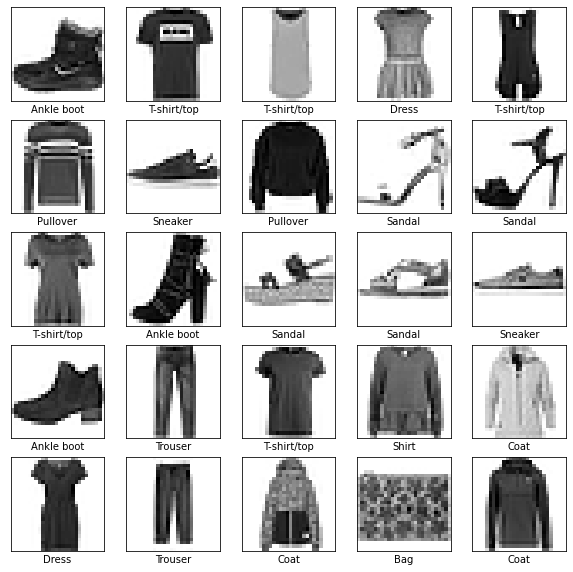

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(fashion_mnist_labels[train_labels[i]])
plt.show()

<H3>Определим нашу модель</H3>

*   Построим модель
*   Настроим слои



In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Первый слой этой сети - `tf.keras.layers.Flatten`, преобразует формат изображения из двумерного массива (28 на 28 пикселей) в одномерный (размерностью 28 * 28 = 784 пикселя). Слой извлекает строки пикселей из изображения и выстраивает их в один ряд. Этот слой не имеет параметров для обучения; он только переформатирует данные.

После разложения пикселей, нейросеть содержит два слоя `tf.keras.layers.Dense`. Это полносвязные нейронные слои. Первый `Dense` слой состоит из 128 узлов (или нейронов). Второй (и последний) 10-узловой *softmax* слой возвращает массив из 10 вероятностных оценок дающих в сумме 1. Каждый узел содержит оценку указывающую вероятность принадлежности изображения к одному из 10 классов.

### Сконфигурируем процесс обучения с помощью API compile () перед обучением модели. Он получает три аргумента: 

* *Функция потерь (Loss function)* — измеряет точность модели во время обучения. Мы хотим минимизировать эту функцию чтоб "направить" модель в верном направлении.
* *Оптимизатор (Optimizer)*  — показывает каким образом обновляется модель на основе входных данных и функции потерь.
* *Метрики (Metrics)* — используются для мониторинга тренировки и тестирования модели. Наш пример использует метрику *accuracy* равную доле правильно классифицированных изображений.

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Для начала обучения, вызовем метод model.fit, который называется так, поскольку "тренирует (fits)" модель на тренировочных данных. 

In [0]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4978 - accuracy: 0.8257
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3770 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3389 - accuracy: 0.8763
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3149 - accuracy: 0.8844
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2971 - accuracy: 0.8898
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2826 - accuracy: 0.8944
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2706 - accuracy: 0.8991
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2594 - accuracy: 0.9045
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2500 - accuracy: 0.9066
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.242

Оценим точность выполнения нашей модели

In [0]:
# Evaluate the model on test set
score = model.evaluate(train_images, train_labels, verbose=2)

# Print test accuracy
print('\n', 'Точность выполнения теста:', score[1])

1875/1875 - 2s - loss: 0.2175 - accuracy: 0.9186

 Точность выполнения теста: 0.9186166524887085


## Сделать предсказания

Теперь, когда модель обучена, мы можем использовать ее чтобы сделать предсказания по поводу нескольких изображений:

In [0]:
predictions = model.predict(test_images)

Прогноз представляет из себя массив из 10 чисел. Они описывают "уверенность" (confidence) модели в том, насколько изображение соответствует каждому из 10 разных видов одежды. Мы можем посмотреть какой метке соответствует максимальное значение:

In [0]:
np.argmax(predictions[0])

9

In [0]:
test_labels[0]

9

Мы можем построить график, чтобы взглянуть на полный набор из 10 предсказаний классов. Для этого создадим функцию <ins>`plot_image`</ins>

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(fashion_mnist_labels [predicted_label],
                                100*np.max(predictions_array),
                                fashion_mnist_labels [true_label]),
                                color=color)

Давайте посмотрим на нулевое изображение, предсказание и массив предсказаний.

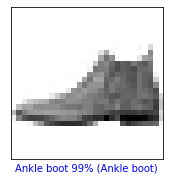

In [0]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.show()

Давайте посмотрим несколько изображений с их прогнозами. Цвет верных предсказаний синий, а неверных - красный. Число это процент уверенности (от 100) для предсказанной метки. Отметим, что модель может ошибаться даже если она очень уверена.

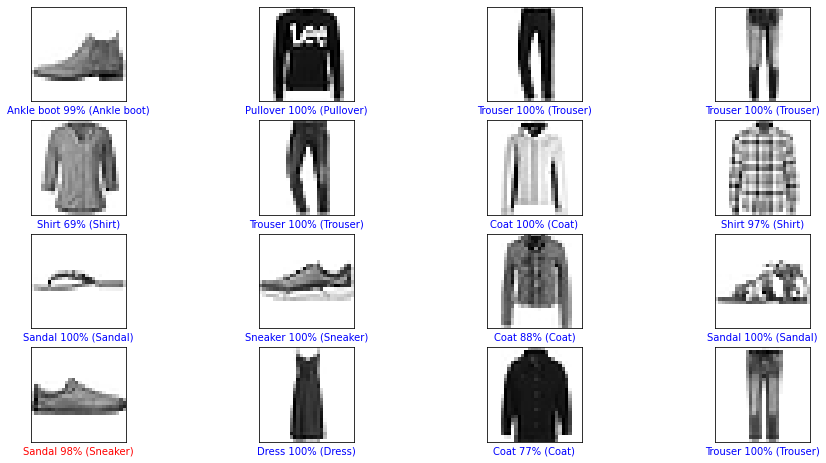

In [0]:
# Отображаем первые X тестовых изображений, их предсказанную и настоящую метки.
# Корректные предсказания окрашиваем в синий цвет, ошибочные в красный.
num_rows = 4
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
plt.show()